# Exercise 6
***

## 1.

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc_stats
import scipy.integrate as sc_integrate

plt.rcParams['axes.facecolor'] = 'black'

n = 3000
std1 = 0.3
w = np.random.normal(0, std1, n)

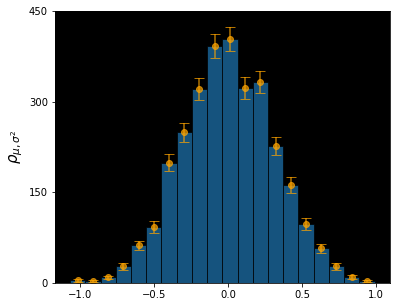

In [171]:
fig, ax = plt.subplots(1,1 , figsize=(6,5))
a,b,c = ax.hist(w, bins=20, alpha=0.7, edgecolor='black')
yerr = np.sqrt(a)
plt.errorbar(b[:20]+1/2*(abs(b[0]-b[1])), a, yerr ,fmt='o', alpha = 0.7, color = 'orange', capsize=5)
plt.ylabel(r'$\rho_{ \mu ,\sigma ^2}$', fontsize=15)
plt.yticks(np.arange(0, np.max(a+0.05*n), 0.05*n))

plt.show()

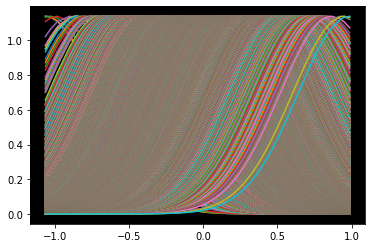

In [179]:
std = 0.35
w = np.sort(w)
gau = []
gau = np.array([sc_stats.norm(loc=x, scale=std).pdf(w) for x in w])

for x in gau:
    plt.plot(w, x)

([<matplotlib.axis.YTick at 0x7fe449f0e340>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

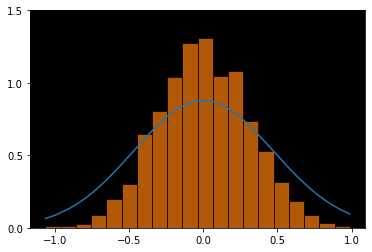

In [173]:
gau_sum = np.sum(gau, axis=0)
normalize = 1/sc_integrate.trapz(gau_sum, w)
gau_sum = gau_sum * normalize
plt.plot(w, gau_sum)
plt.hist(w, bins=20, alpha=0.7, density=True, edgecolor='black') 
plt.yticks(np.arange(0, 2, 0.5))

In [174]:
print(sc_integrate.trapz(gau_sum, w))
print(np.sum(a)*abs(abs(b[0]-b[1]))/(0.1*n))

0.9999999999999999
1.0259086642729798


## 2.

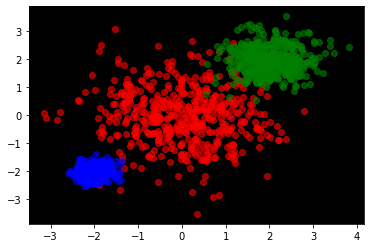

In [175]:
def d2_data(mean, std, size):
    return np.array([np.random.normal(mean, std, size), np.random.normal(mean, std, size)])

x1 = d2_data(0, 1, 500)
x2 = d2_data(2, 0.5, 500)
x3 = d2_data(-2, 0.2, 500)

plt.scatter(x1[0], x1[1], color='r', alpha=0.6)
plt.scatter(x2[0], x2[1], color='g', alpha=0.6)
plt.scatter(x3[0], x3[1], color='b', alpha=0.6)

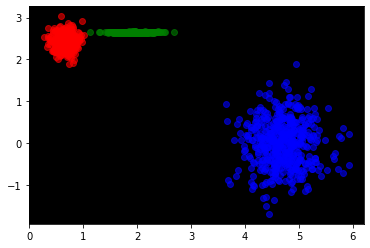

In [176]:
# mean and std random in intervall from 0 to mean/std

def d2_data(mean, std, size):
    return np.array([np.random.normal(np.random.uniform(0, mean), np.random.uniform(0, std), size), np.random.normal(np.random.uniform(0, mean), np.random.uniform(0, std), size)])

x1 = d2_data(5, 0.7, 500)
x2 = d2_data(5, 0.7, 500)
x3 = d2_data(5, 0.7, 500)

plt.scatter(x1[0], x1[1], color='r', alpha=0.6)
plt.scatter(x2[0], x2[1], color='g', alpha=0.6)
plt.scatter(x3[0], x3[1], color='b', alpha=0.6)

## 3.


In [45]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data/

--2021-12-01 14:59:36--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com... 162.125.72.18
Connecting to www.dropbox.com|162.125.72.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-01 14:59:37--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf0dc76f2f74ae58db1ad3c824.dl.dropboxusercontent.com/cd/0/inline/BbBMtI38mMULcUYp0_0nE9KxXb9EDpq6genGIkkxcYSiIIel6uMDq5aSA9-JOuyvFTDWJAeOyPqnSNTUieOEgC96vcK47ZTWhNI1oF9x1NDKqvoUwuZPWXY6jnobXP91qnmBjTTSiJVyOQcFsgTKWK_z/file# [following]
--2021-12-01 14:59:37--  https://ucaf0dc76f2f74ae58db1ad3c824.dl.dropboxusercontent.com/cd/0/inline/BbBMtI38mMULcUYp0_0nE9KxXb9EDpq6genGIkkxcYSiIIel6uMDq5aSA9-JOuyvFTDWJAeOyPqnSNTUieOEgC96vcK47ZTWhNI1oF9x1NDKqvoUwuZPWXY6jnobXP91qnmBjTTSi

In [79]:
data = np.load('/Users/max/data/residuals_261.npy', allow_pickle=True)

In [80]:
import pandas as pd

data = pd.DataFrame(data.item())

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB


In [85]:
mask = abs(data['residuals']) < 2
residuals = data['residuals'][mask]
distances = data['distances'][mask]

In [97]:
import scipy as sc
sc.stats.linregress(data['residuals'][mask],data['distances'][mask])

LinregressResult(slope=0.577913366635926, intercept=10.025258299436526, rvalue=0.04340351052255908, pvalue=8.717037183576464e-06, stderr=0.12989809632256552, intercept_stderr=0.05919737176060826)

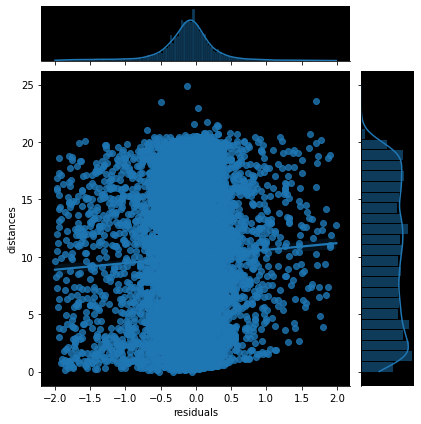

In [177]:
import seaborn as sns

sns.jointplot(x=data['residuals'][mask], y=data['distances'][mask], kind='reg')

In [184]:
x = np.arange(0.5, 20 , 0.5)
print(x)

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]


In [207]:
y = [[np.sum(data['distances'][i]) for s in x ]for i in data.index if s - 0.5 < data['distances'][i] < 0.5 + s]

NameError: name 's' is not defined

ValueError: x and y must have same first dimension, but have shapes (39,) and (19663, 1)

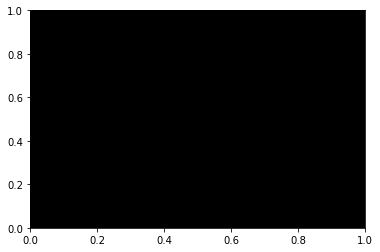

In [201]:
plt.plot(x, y)